In [1]:
import tensorflow as tf
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# alternative impementation of tf model
source : https://www.tensorflow.org/guide/core/logistic_regression_core

# load data

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'

features = ['radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness',
            'concavity', 'concave_poinits', 'symmetry', 'fractal_dimension']
column_names = ['id', 'diagnosis']

for attr in ['mean', 'ste', 'largest']:
    for feature in features:
        column_names.append(feature + "_" + attr)

In [13]:
features = [ 
           'radius_mean', 'texture_mean', 'perimeter_mean',
           'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
           'concave_poinits_mean', 'symmetry_mean', 'fractal_dimension_mean',
           'radius_ste', 'texture_ste', 'perimeter_ste', 'area_ste',
           'smoothness_ste', 'compactness_ste', 'concavity_ste',
           'concave_poinits_ste', 'symmetry_ste', 'fractal_dimension_ste',
           'radius_largest', 'texture_largest', 'perimeter_largest',
           'area_largest', 'smoothness_largest', 'compactness_largest',
           'concavity_largest', 'concave_poinits_largest', 'symmetry_largest',
           'fractal_dimension_largest']

labels = ["diagnosis"]

In [18]:
dataset = pd.read_csv(url, names=column_names)
dataset[labels] = dataset[labels].replace({'B': 0, 'M': 1})

In [19]:
train_dataset = dataset.sample(frac=0.75, random_state=1)
test_dataset = dataset.drop(train_dataset.index)

# preprosesing

In [21]:
# get feature/labels
x_train, y_train = train_dataset[features], train_dataset[labels]
x_test, y_test = test_dataset[features], test_dataset[labels]

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_norm = scaler.fit_transform(x_train)
x_test_norm = scaler.fit_transform(x_test)

# test logistic regresion tf

In [23]:
import tensorflow as tf

class LogisticRegresionTF(tf.keras.Model):
    """
    logistic regresion model , tensorflow
    """
    def __init__(self, input_dim):
        super(LogisticRegresionTF, self).__init__()
        w_init = tf.random_normal_initializer()
        self.w = tf.Variable(
            initial_value=w_init(shape=(input_dim, 1), dtype="float32"),
            trainable=True,
        )
        b_init = tf.zeros_initializer()
        self.b = tf.Variable(
            initial_value=b_init(shape=(), dtype="float32"),
            trainable=True
        )

    def call(self, inputs):
        return tf.nn.sigmoid(tf.matmul(inputs,self.w) + self.b)

In [28]:
policy = LogisticRegresionTF(input_dim=x_train_norm.shape[1])

In [29]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
policy.compile(optimizer=optimizer,
               loss = "BinaryCrossentropy",
               metrics = ["accuracy"])

In [30]:
history = policy.fit(x_train_norm,
                     y_train,
                     validation_data=(x_test_norm, y_test),
                     epochs=200,
                     batch_size=63,
                     shuffle=True).history

Epoch 1/200
7/7 [==============================] - 0s 11ms/step - loss: 0.5595 - accuracy: 0.8525 - val_loss: 0.5123 - val_accuracy: 0.9085
Epoch 2/200
7/7 [==============================] - 0s 2ms/step - loss: 0.4907 - accuracy: 0.8806 - val_loss: 0.4555 - val_accuracy: 0.9366
Epoch 3/200
7/7 [==============================] - 0s 2ms/step - loss: 0.4420 - accuracy: 0.8970 - val_loss: 0.4137 - val_accuracy: 0.9366
Epoch 4/200
7/7 [==============================] - 0s 2ms/step - loss: 0.4057 - accuracy: 0.9063 - val_loss: 0.3814 - val_accuracy: 0.9507
Epoch 5/200
7/7 [==============================] - 0s 2ms/step - loss: 0.3774 - accuracy: 0.9180 - val_loss: 0.3553 - val_accuracy: 0.9507
Epoch 6/200
7/7 [==============================] - 0s 2ms/step - loss: 0.3546 - accuracy: 0.9180 - val_loss: 0.3338 - val_accuracy: 0.9577
Epoch 7/200
7/7 [==============================] - 0s 2ms/step - loss: 0.3356 - accuracy: 0.9204 - val_loss: 0.3157 - val_accuracy: 0.9577
Epoch 8/200
7/7 [=========

7/7 [==============================] - 0s 2ms/step - loss: 0.1447 - accuracy: 0.9649 - val_loss: 0.1294 - val_accuracy: 0.9859
Epoch 60/200
7/7 [==============================] - 0s 2ms/step - loss: 0.1438 - accuracy: 0.9649 - val_loss: 0.1285 - val_accuracy: 0.9859
Epoch 61/200
7/7 [==============================] - 0s 2ms/step - loss: 0.1428 - accuracy: 0.9649 - val_loss: 0.1277 - val_accuracy: 0.9859
Epoch 62/200
7/7 [==============================] - 0s 2ms/step - loss: 0.1419 - accuracy: 0.9672 - val_loss: 0.1269 - val_accuracy: 0.9859
Epoch 63/200
7/7 [==============================] - 0s 2ms/step - loss: 0.1410 - accuracy: 0.9672 - val_loss: 0.1261 - val_accuracy: 0.9859
Epoch 64/200
7/7 [==============================] - 0s 2ms/step - loss: 0.1402 - accuracy: 0.9672 - val_loss: 0.1253 - val_accuracy: 0.9859
Epoch 65/200
7/7 [==============================] - 0s 2ms/step - loss: 0.1393 - accuracy: 0.9696 - val_loss: 0.1246 - val_accuracy: 0.9859
Epoch 66/200
7/7 [===============

7/7 [==============================] - 0s 2ms/step - loss: 0.1115 - accuracy: 0.9789 - val_loss: 0.1019 - val_accuracy: 0.9859
Epoch 118/200
7/7 [==============================] - 0s 2ms/step - loss: 0.1112 - accuracy: 0.9789 - val_loss: 0.1016 - val_accuracy: 0.9859
Epoch 119/200
7/7 [==============================] - 0s 2ms/step - loss: 0.1109 - accuracy: 0.9789 - val_loss: 0.1014 - val_accuracy: 0.9859
Epoch 120/200
7/7 [==============================] - 0s 2ms/step - loss: 0.1105 - accuracy: 0.9789 - val_loss: 0.1011 - val_accuracy: 0.9859
Epoch 121/200
7/7 [==============================] - 0s 2ms/step - loss: 0.1102 - accuracy: 0.9789 - val_loss: 0.1009 - val_accuracy: 0.9859
Epoch 122/200
7/7 [==============================] - 0s 2ms/step - loss: 0.1099 - accuracy: 0.9789 - val_loss: 0.1006 - val_accuracy: 0.9859
Epoch 123/200
7/7 [==============================] - 0s 2ms/step - loss: 0.1095 - accuracy: 0.9789 - val_loss: 0.1004 - val_accuracy: 0.9859
Epoch 124/200
7/7 [========

7/7 [==============================] - 0s 2ms/step - loss: 0.0969 - accuracy: 0.9813 - val_loss: 0.0917 - val_accuracy: 0.9859
Epoch 176/200
7/7 [==============================] - 0s 2ms/step - loss: 0.0967 - accuracy: 0.9813 - val_loss: 0.0916 - val_accuracy: 0.9859
Epoch 177/200
7/7 [==============================] - 0s 2ms/step - loss: 0.0965 - accuracy: 0.9813 - val_loss: 0.0915 - val_accuracy: 0.9859
Epoch 178/200
7/7 [==============================] - 0s 2ms/step - loss: 0.0963 - accuracy: 0.9813 - val_loss: 0.0914 - val_accuracy: 0.9859
Epoch 179/200
7/7 [==============================] - 0s 2ms/step - loss: 0.0962 - accuracy: 0.9813 - val_loss: 0.0912 - val_accuracy: 0.9859
Epoch 180/200
7/7 [==============================] - 0s 2ms/step - loss: 0.0960 - accuracy: 0.9813 - val_loss: 0.0911 - val_accuracy: 0.9859
Epoch 181/200
7/7 [==============================] - 0s 2ms/step - loss: 0.0958 - accuracy: 0.9813 - val_loss: 0.0910 - val_accuracy: 0.9859
Epoch 182/200
7/7 [========

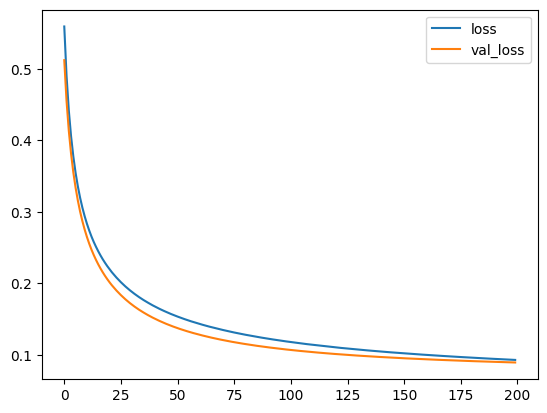

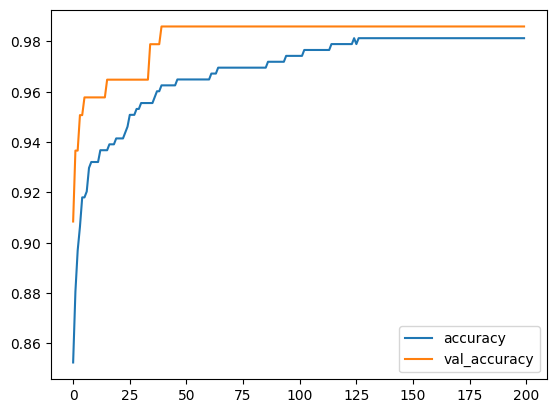

In [34]:
plt.figure()
plt.plot(history["loss"],label="loss")
plt.plot(history["val_loss"],label="val_loss")
plt.legend()
plt.show()

plt.figure()
plt.plot(history["accuracy"],label="accuracy")
plt.plot(history["val_accuracy"],label="val_accuracy")
plt.legend()
plt.show()

In [35]:
print("final train accuracy:", history["accuracy"][-1])
print("final test accuracy:", history["val_accuracy"][-1])

final train accuracy: 0.9812646508216858
final test accuracy: 0.98591548204422
